**Data Visualization**

In [1]:
#Importing Libraries for Data Visulization
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

1. Covid Positive Visualization

In [3]:
# Path to the audio file
audio_file = '/kaggle/input/covid-19-cough-sounds/cleaned_data/Positive/1037_Positive_male_27.wav'

# Load the audio file
data, sample_rate = librosa.load(audio_file)

Text(92.34722222222221, 0.5, 'Amplitude')

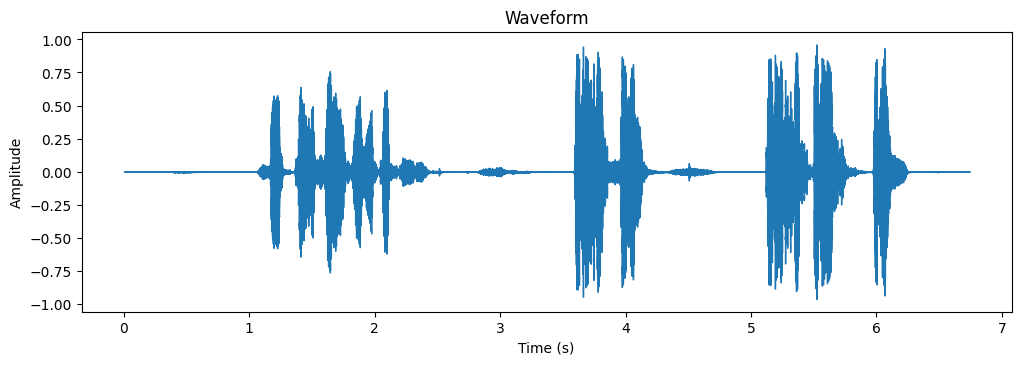

In [4]:
#Wave Form of the Audio Signal
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

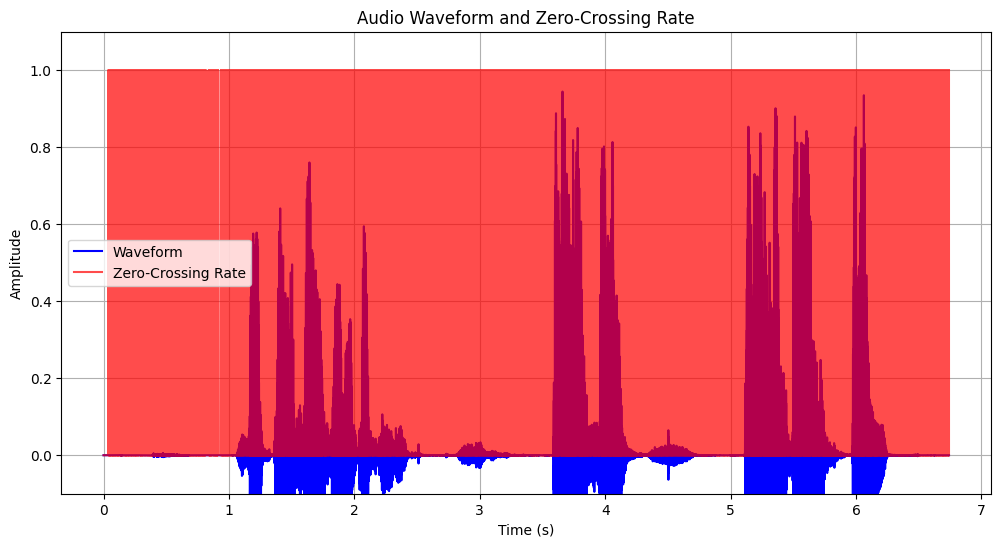

In [5]:
#Zero Crossing Rate

# Compute the zero crossinng rate
zero_crossings = librosa.zero_crossings(data, pad=False)

time = np.arange(len(data)) / float(sample_rate)

#Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, data, label='Waveform', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform and Zero-Crossing Rate')
plt.grid(True)
plt.plot(time, zero_crossings, label='Zero-Crossing Rate', color='red', alpha=0.7)
plt.ylim(-0.1, 1.1) 
plt.legend()
plt.show()

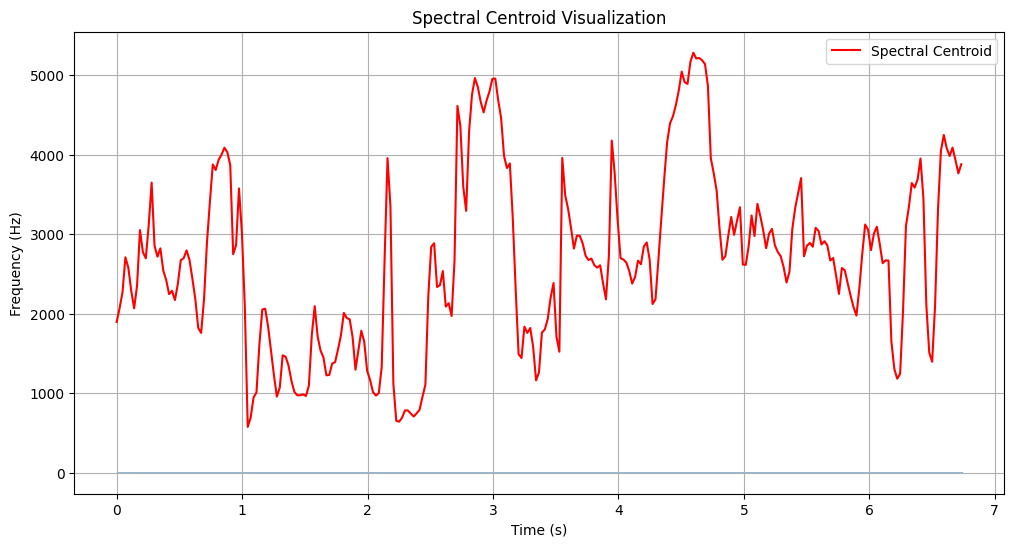

In [6]:
#Spectral Centriod

# Compute the spectral centroid
spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sample_rate)[0]

# Create a time array corresponding to each frame
time = librosa.times_like(spectral_centroid)

# Plotting the spectral centroid
plt.figure(figsize=(12, 6))
librosa.display.waveshow(data, sr=sample_rate, alpha=0.5)
plt.plot(time, spectral_centroid, color='r', label='Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Centroid Visualization')
plt.legend()
plt.grid(True)
plt.show()

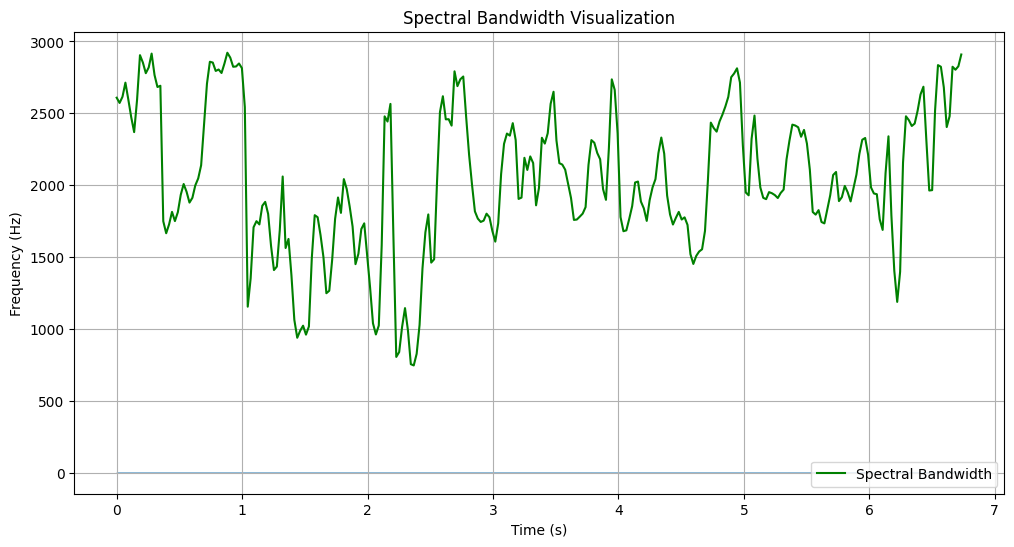

In [7]:
#Spectral Bandwidth

# Compute the spectral bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sample_rate)[0]

# Create a time array corresponding to each frame
time = librosa.times_like(spectral_centroid)

# Plotting the spectral bandwidth
plt.figure(figsize=(12, 6))
librosa.display.waveshow(data, sr=sample_rate, alpha=0.5)
plt.plot(time, spectral_bandwidth, color='g', label='Spectral Bandwidth')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Bandwidth Visualization')
plt.legend()
plt.grid(True)
plt.show()

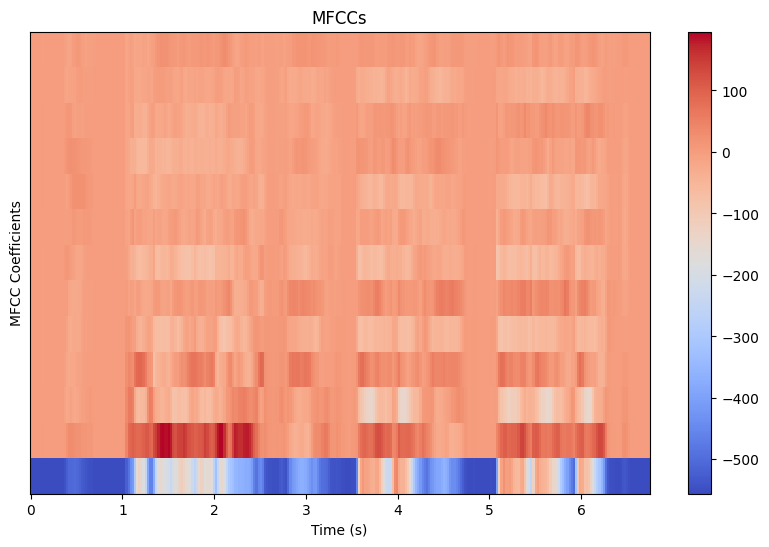

In [8]:
#Mel Frequency Cepstral Coefficients 

#Calculating of MFCC
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)

#Plotting
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()


2. Covid Negative Visualization

In [9]:
# Path to the audio file
audio_file = '/kaggle/input/covid-19-cough-sounds/cleaned_data/Negative/0_Negative_male_26.wav'

# Load the audio file
data, sample_rate = librosa.load(audio_file)

Text(92.34722222222221, 0.5, 'Amplitude')

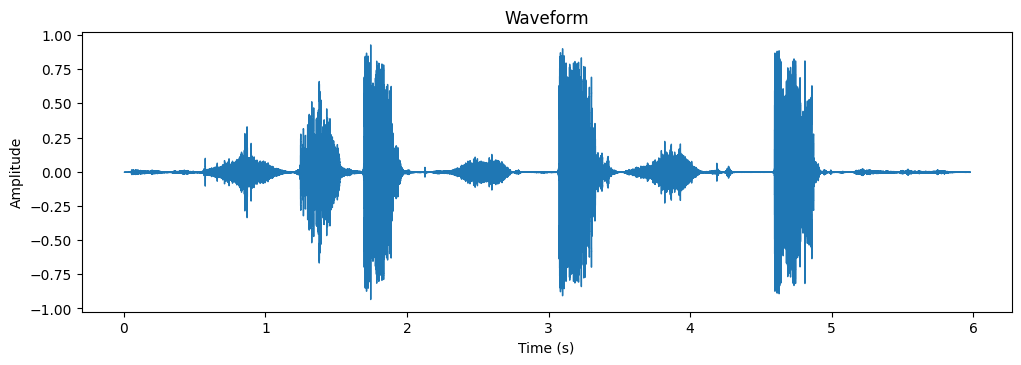

In [10]:
#Wave Form of the Audio Signal
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

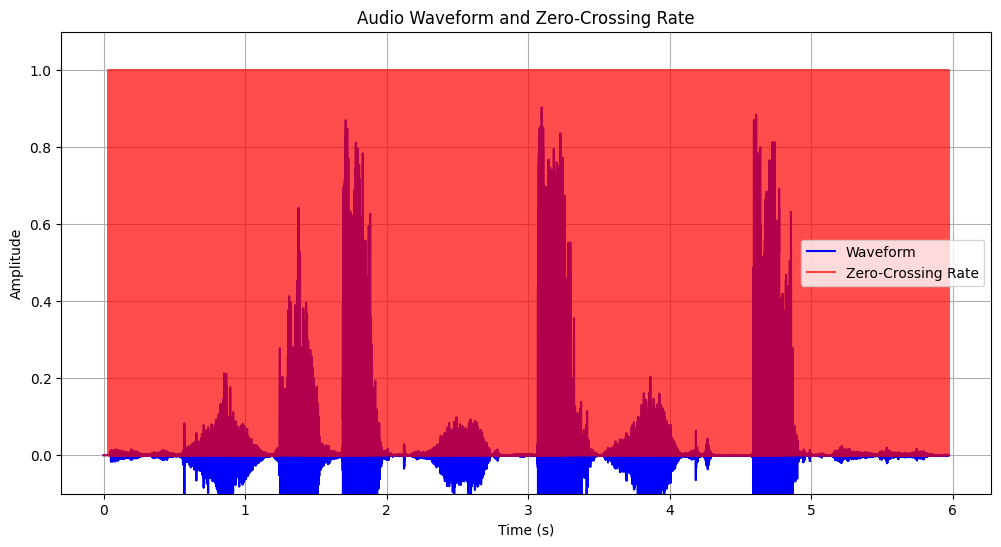

In [11]:
#Zero Crossing Rate

# Compute the zero crossinng rate
zero_crossings = librosa.zero_crossings(data, pad=False)

time = np.arange(len(data)) / float(sample_rate)

#Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, data, label='Waveform', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform and Zero-Crossing Rate')
plt.grid(True)
plt.plot(time, zero_crossings, label='Zero-Crossing Rate', color='red', alpha=0.7)
plt.ylim(-0.1, 1.1) 
plt.legend()
plt.show()

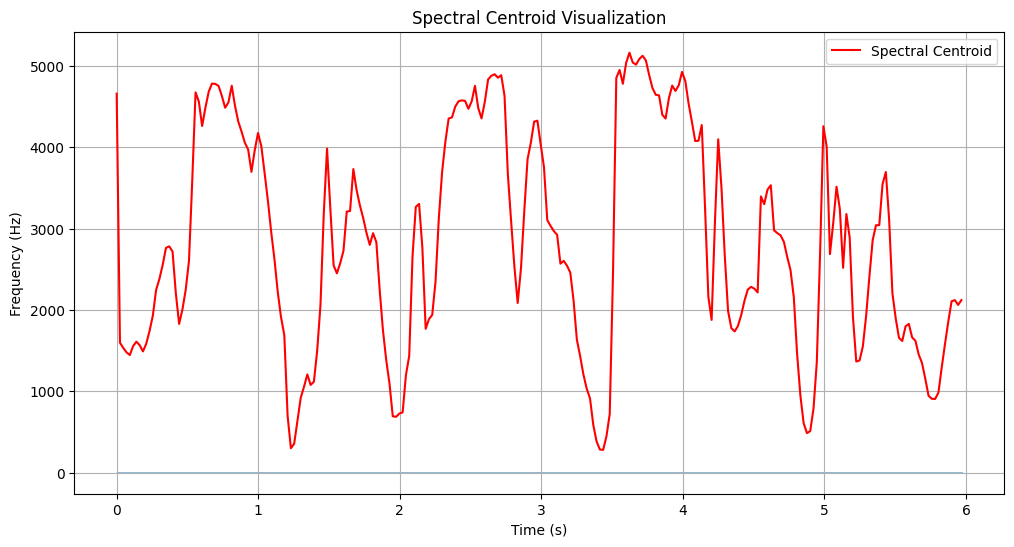

In [12]:
#Spectral Centriod

# Compute the spectral centroid
spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sample_rate)[0]

# Create a time array corresponding to each frame
time = librosa.times_like(spectral_centroid)

# Plotting the spectral centroid
plt.figure(figsize=(12, 6))
librosa.display.waveshow(data, sr=sample_rate, alpha=0.5)
plt.plot(time, spectral_centroid, color='r', label='Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Centroid Visualization')
plt.legend()
plt.grid(True)
plt.show()

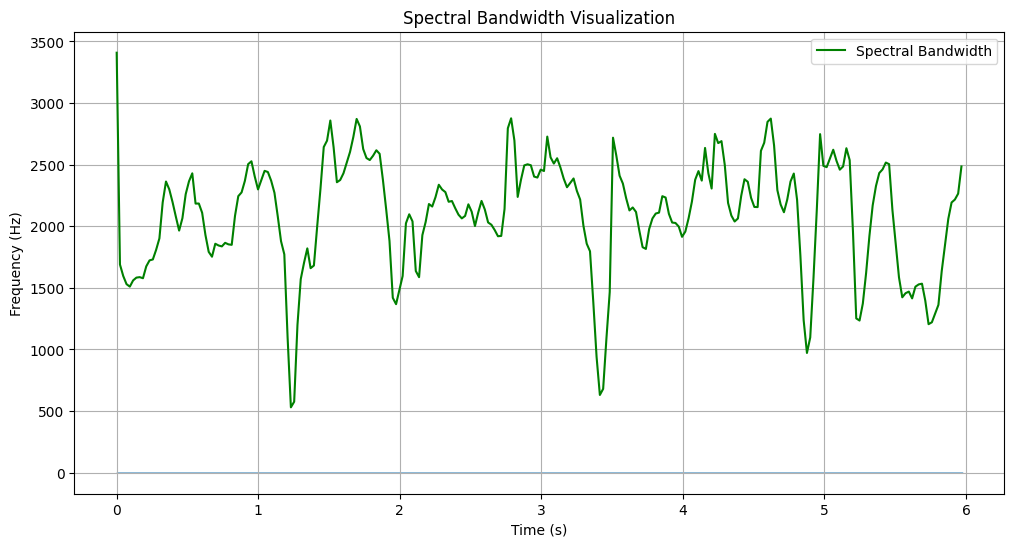

In [13]:
#Spectral Bandwidth

# Compute the spectral bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sample_rate)[0]

# Create a time array corresponding to each frame
time = librosa.times_like(spectral_centroid)

# Plotting the spectral bandwidth
plt.figure(figsize=(12, 6))
librosa.display.waveshow(data, sr=sample_rate, alpha=0.5)
plt.plot(time, spectral_bandwidth, color='g', label='Spectral Bandwidth')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Bandwidth Visualization')
plt.legend()
plt.grid(True)
plt.show()

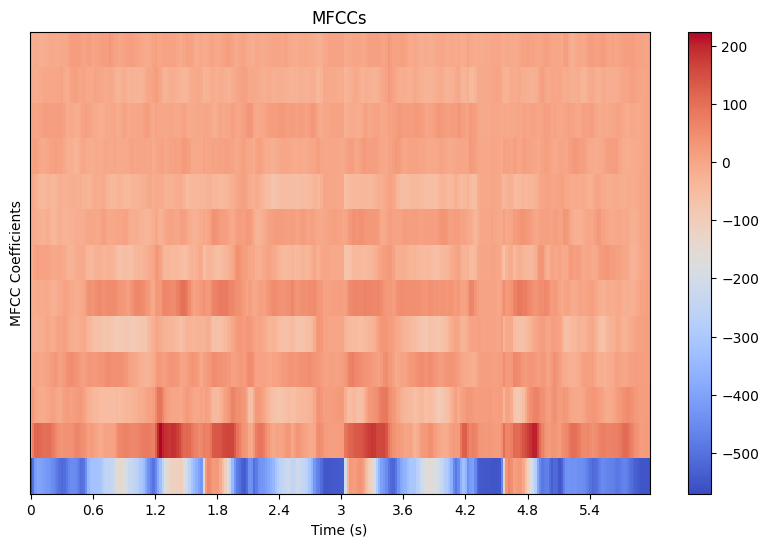

In [14]:
#Mel Frequency Cepstral Coefficients 

#Calculating of MFCC
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)

#Plotting
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()


**Feature Extraction and Data Preprocessing**

In [15]:
import os
import librosa
import pandas as pd
import numpy as np

In [16]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    y, _ = librosa.effects.trim(y, top_db=20)

    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    rms_energy = np.mean(librosa.feature.rms(y=y))
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)

    features = list(mfccs_mean) + [zcr, spectral_centroid, spectral_bandwidth, spectral_rolloff, rms_energy]
    
    return features

In [17]:
folder_path = '/kaggle/input/covid-19-cough-sounds/cleaned_data/Positive'

data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(folder_path, file_name)
        features = extract_features(file_path)
        features.insert(0, file_name)
        features.append('covid')
        data.append(features)

columns = ['file_name'] + [f'mfcc_{i}' for i in range(1, 21)] + [
            'zcr', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'rms_energy'] +  ['label']

In [18]:
df = pd.DataFrame(data, columns=columns)
df.to_csv('covid_positive.csv', index=False)

In [19]:
folder_path = '/kaggle/input/covid-19-cough-sounds/cleaned_data/Negative'

data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(folder_path, file_name)
        features = extract_features(file_path)
        features.insert(0, file_name)
        features.append('non covid')
        data.append(features)

columns = ['file_name'] + [f'mfcc_{i}' for i in range(1, 21)] + [
            'zcr', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'rms_energy'] +  ['label']

/opt/conda/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [20]:
df = pd.DataFrame(data, columns=columns)
df.to_csv('covid_negative.csv', index=False)

In [21]:
df = pd.read_csv('covid_positive.csv')

In [22]:
df.head()

,file_name,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_17,mfcc_18,mfcc_19,mfcc_20,zcr,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms_energy,label
0,957_Positive_male_23.wav,-539.38040,113.714200,16.037067,-9.102831,-8.576136,-19.266666,-12.762718,-2.362609,-13.992632,...,-3.203566,-5.466837,-1.193569,-0.616027,0.032282,2239.114706,2947.520386,4412.248884,0.012928,covid
1,1176_Positive_female_50.wav,-392.90490,112.843110,4.955421,-4.193194,-1.907621,-15.956728,-11.426367,-17.972950,-24.549380,...,-3.383130,-9.007072,-7.878702,-3.663442,0.042460,1614.496613,1998.241619,2892.884814,0.065939,covid
2,733_Positive_male_37.wav,-260.97488,74.484030,-9.792900,27.632840,-32.948994,1.792916,-5.456554,-19.336956,-3.979064,...,4.395857,-6.154388,-7.918105,-1.477493,0.164396,5343.571890,4245.873199,10289.718750,0.127940,covid
3,888_Positive_male_25.wav,-390.35455,97.716930,-12.186467,3.284184,2.607110,0.812589,16.212051,-14.840712,-27.379540,...,-10.331889,-4.320787,-1.948016,-5.741772,0.069798,2838.415306,2901.479043,5237.399194,0.071371,covid
4,1198_Positive_male_22.wav,-505.53467,91.998695,-65.844430,-3.478439,-16.661613,-22.270262,23.514013,-11.726788,-25.967243,...,6.474431,13.855955,-2.629530,-5.761071,0.068965,3072.702663,2877.063840,5929.236779,0.017137,covid


In [23]:
df.columns

Index(['file_name', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
       'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18',
       'mfcc_19', 'mfcc_20', 'zcr', 'spectral_centroid', 'spectral_bandwidth',
       'spectral_rolloff', 'rms_energy', 'label'],
      dtype='object')

In [24]:
df = pd.read_csv('covid_negative.csv')

In [25]:
df.head()

,file_name,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_17,mfcc_18,mfcc_19,mfcc_20,zcr,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms_energy,label
0,127_Negative_female_22.wav,-510.01593,55.58194,-19.216291,13.942908,5.333053,-8.736740,6.218059,-8.784716,-11.461836,...,-1.905424,0.032949,-4.831840,-2.094311,0.042823,2337.297346,2545.344763,4610.259956,0.013864,non covid
1,1268_Negative_male_23.wav,-429.77160,74.86063,-33.129530,19.557194,-4.017695,-21.572369,13.408204,-10.278883,-16.135298,...,-6.307940,-0.161803,-7.092726,-3.774711,0.096503,3746.489504,3508.157495,7146.464322,0.047886,non covid
2,428_Negative_male_30.wav,-302.91357,92.64858,-56.730335,24.785242,-7.395835,-34.564460,13.091130,-13.738568,-9.482397,...,-6.745947,3.169450,-4.648320,-4.004764,0.124292,3716.252843,2802.773013,6467.674885,0.106535,non covid
3,1031_Negative_female_22.wav,-417.91910,97.32169,9.709890,4.686575,1.702529,-15.820018,-8.419882,-5.814693,-12.864471,...,-8.008655,-6.719560,-2.848974,-2.645858,0.024604,1670.281613,2499.547094,3014.149127,0.072683,non covid
4,465_Negative_male_65.wav,-315.59424,94.68344,-0.801174,-6.125617,-4.956976,5.457982,0.230718,-6.255438,-8.176161,...,-0.872267,-0.539676,-1.871318,-6.385701,0.068722,2466.491075,2496.892575,4499.181223,0.109557,non covid


In [26]:
df.columns

Index(['file_name', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
       'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18',
       'mfcc_19', 'mfcc_20', 'zcr', 'spectral_centroid', 'spectral_bandwidth',
       'spectral_rolloff', 'rms_energy', 'label'],
      dtype='object')

In [27]:
#Merging of Files

df1 = pd.read_csv('covid_positive.csv')
df2 = pd.read_csv('covid_negative.csv')

df = pd.concat([df1, df2], ignore_index=True)

df.to_csv('Features.csv', index=False)

In [28]:
df = pd.read_csv('Features.csv')

In [29]:
df.head()

,file_name,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_17,mfcc_18,mfcc_19,mfcc_20,zcr,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms_energy,label
0,957_Positive_male_23.wav,-539.38040,113.714200,16.037067,-9.102831,-8.576136,-19.266666,-12.762718,-2.362609,-13.992632,...,-3.203566,-5.466837,-1.193569,-0.616027,0.032282,2239.114706,2947.520386,4412.248884,0.012928,covid
1,1176_Positive_female_50.wav,-392.90490,112.843110,4.955421,-4.193194,-1.907621,-15.956728,-11.426367,-17.972950,-24.549380,...,-3.383130,-9.007072,-7.878702,-3.663442,0.042460,1614.496613,1998.241619,2892.884814,0.065939,covid
2,733_Positive_male_37.wav,-260.97488,74.484030,-9.792900,27.632840,-32.948994,1.792916,-5.456554,-19.336956,-3.979064,...,4.395857,-6.154388,-7.918105,-1.477493,0.164396,5343.571890,4245.873199,10289.718750,0.127940,covid
3,888_Positive_male_25.wav,-390.35455,97.716930,-12.186467,3.284184,2.607110,0.812589,16.212051,-14.840712,-27.379540,...,-10.331889,-4.320787,-1.948016,-5.741772,0.069798,2838.415306,2901.479043,5237.399194,0.071371,covid
4,1198_Positive_male_22.wav,-505.53467,91.998695,-65.844430,-3.478439,-16.661613,-22.270262,23.514013,-11.726788,-25.967243,...,6.474431,13.855955,-2.629530,-5.761071,0.068965,3072.702663,2877.063840,5929.236779,0.017137,covid


In [30]:
df.columns

Index(['file_name', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
       'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18',
       'mfcc_19', 'mfcc_20', 'zcr', 'spectral_centroid', 'spectral_bandwidth',
       'spectral_rolloff', 'rms_energy', 'label'],
      dtype='object')

In [31]:
df.shape

(1309, 27)

**Model Selection**

*Random Forest Classifier*

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [33]:
df = pd.read_csv('/kaggle/working/Features.csv')

In [34]:
X = df.drop(['file_name','label'], axis=1)
y = df['label']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [38]:
y_pred = rf.predict(X_test)

In [39]:
acc = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
print("Accuracy: ",acc)
print("Precision: ",p)
print("Recall: ",r)
print("F1 Score: ",f1)

Accuracy:  0.9236641221374046
Precision:  0.4618320610687023
Recall:  0.5
F1 Score:  0.4801587301587301


In [41]:
joblib.dump(rf, 'model_randon_forest.pkl')

['model_randon_forest.pkl']

*Support Vector Machine*

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [43]:
df = pd.read_csv('Features.csv')

In [44]:
X = df.drop(['file_name','label'], axis=1)
y = df['label']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [47]:
y_pred = svm_model.predict(X_test)

In [48]:
acc = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [49]:
print("Accuracy: ",acc)
print("Precision: ",p)
print("Recall: ",r)
print("F1 Score: ",f1)

Accuracy:  0.9236641221374046
Precision:  0.7151162790697674
Recall:  0.5458677685950414
F1 Score:  0.5633333333333334


In [50]:
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

*Gradient Boosting Classifier*

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [52]:
df = pd.read_csv('Features.csv')

In [53]:
X = df.drop(['file_name','label'], axis=1)
y = df['label']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [56]:
y_pred = gbc_model.predict(X_test)

In [57]:
acc = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [58]:
print("Accuracy: ",acc)
print("Precision: ",p)
print("Recall: ",r)
print("F1 Score: ",f1)

Accuracy:  0.9198473282442748
Precision:  0.62998712998713
Recall:  0.5208677685950414
F1 Score:  0.5225201770372299


In [59]:
joblib.dump(gbc_model, 'gbc_model.pkl')

['gbc_model.pkl']

*Convolutional Neural Networks*

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras import models
from keras import layers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

2024-07-13 04:20:33.087861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 04:20:33.087935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 04:20:33.089538: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [61]:
df = pd.read_csv('Features.csv')

In [62]:
df = df.drop(['file_name'],axis=1)

In [63]:
genre_list = df.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [66]:
from keras import models
from keras import layers
from tensorflow.keras.utils import plot_model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("cnn_model.weights.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,464 (728.38 KB)

 Trainable params: 186,464 (728.38 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
                    y_train,
                    epochs=8,
                    batch_size=128)

Epoch 1/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9141 - loss: 0.4466
Epoch 2/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9320 - loss: 0.2690 
Epoch 3/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9272 - loss: 0.2484 
Epoch 4/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9261 - loss: 0.2270 
Epoch 5/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9309 - loss: 0.1923 
Epoch 6/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9304 - loss: 0.1771 
Epoch 7/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9365 - loss: 0.1511 
Epoch 8/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9355 - loss: 0.1349 


In [69]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.9120370370370371
Precision: 0.9118329466357309
Recall: 1.0
F1 Score: 0.9538834951456311


**Comparision of Models**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('graph.xlsx')

In [4]:
models = df['Model']
accuracy = df['Accuracy']
precision = df['Precision']
recall = df['Recall']
f1_score = df['F1 Score']

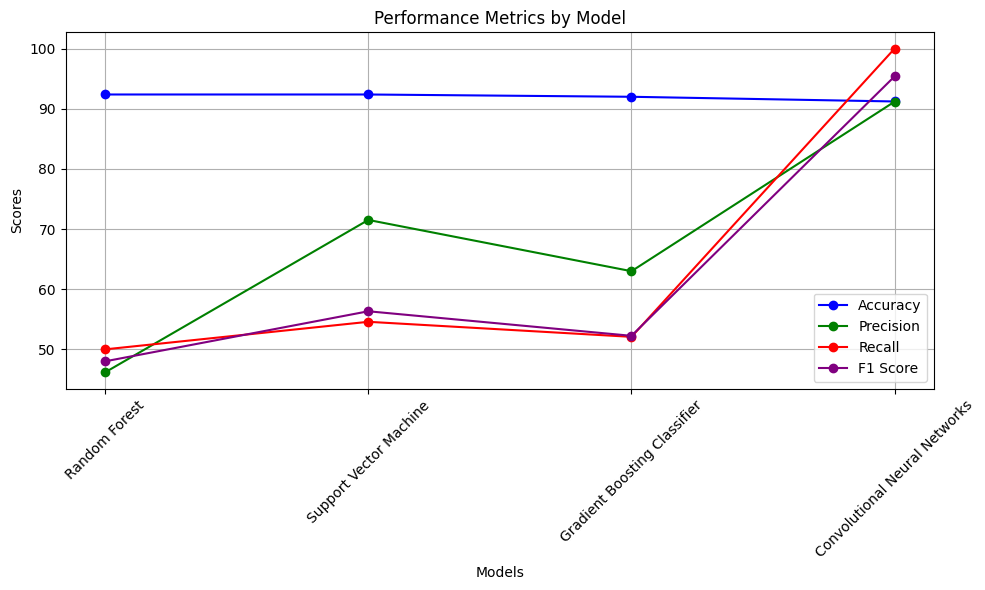

In [5]:
# Plotting
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(models, precision, marker='o', linestyle='-', color='g', label='Precision')
plt.plot(models, recall, marker='o', linestyle='-', color='r', label='Recall')
plt.plot(models, f1_score, marker='o', linestyle='-', color='purple', label='F1 Score')

plt.title('Performance Metrics by Model')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()